<h1> 2. Data Visualization

In [57]:
#Importing all the necessary libraries
import requests
import csv
import numpy as np
import pandas as pd
import urllib
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import seaborn as sns
#Requesting for the website
address = "https://en.wikipedia.org/wiki/World_Happiness_Report"
wikipage = urllib.request.urlopen(address)

soup = BeautifulSoup(wikipage,"html.parser")
#Getting the table
tables = soup.find_all("table")
table = soup.find('table', class_='wikitable sortable')
#Getting the rows of the table to make the dataframe
table_rows = table.find_all('tr')

data = []

for row in table_rows:
    data.append([t.text.strip() for t in row.find_all('td')])
#Making the dataframe
Table = pd.DataFrame(data, columns=['Happiness_ranking', 'Country', 'score', 'GDP per capital', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perception_of_corruption'])
#Table = Table.drop(0)
Table

,Happiness_ranking,Country,score,GDP per capital,Social_support,Healthy_life_expectancy,Freedom_to_make_life_choices,Generosity,Perception_of_corruption
0,None,None,None,None,None,None,None,None,None
1,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
2,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
3,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
4,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
...,...,...,...,...,...,...,...,...,...
152,152,Rwanda,3.334,0.359,0.711,0.614,0.555,0.217,0.411
153,153,Tanzania,3.231,0.476,0.885,0.499,0.417,0.276,0.147
154,154,Afghanistan,3.203,0.350,0.517,0.361,0.000,0.158,0.025
155,155,Central African Republic,3.083,0.026,0.000,0.105,0.225,0.235,0.035


<h5> 1. Plot the distribution of happiness score per country.

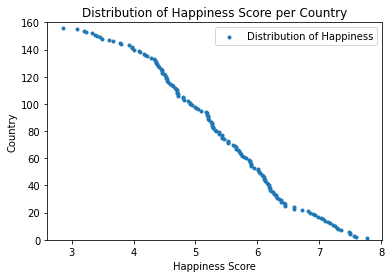

In [58]:
#Getting the Happiness score and Country Ranking values
X = Table.loc[:,'score']
Y = Table.loc[:,'Happiness_ranking']
#Setting limit for y-axis
plot.ylim(0,160)
#Plotting the data
plot.scatter(X, Y, marker = '.', label = 'Distribution of Happiness')
#Setting label for x and y axis
plot.xlabel('Happiness Score')
plot.ylabel('Country')
#Giving a title
plot.title('Distribution of Happiness Score per Country')
#Naming the plotted point
plot.legend(loc = 'upper right',frameon = True)
plot.show()

<h5> 2. Find 10 least happy countries.

In [59]:
#Getting length of the Dataframe
length = len(Table['Country'])
count = 1
print('10 least happy Countries are:')
#Printing the least happy Country names
for i in range(10):
    print(Table.loc[length-count,'Country'])
    count += 1

10 least happy Countries are:
South Sudan
Central African Republic
Afghanistan
Tanzania
Rwanda
Yemen
Malawi
Syria
Botswana
Haiti


<h5> 3. What is the average of happiness?

In [60]:
#Converting string to float
Table['score'] = pd.to_numeric(Table['score'], downcast="float")
#Getting the sum of happiness
Sum = Table['score'].sum()
#Getting the total number n
Length =  len(Table['score'])
Average = Sum/Length
print('Average of happiness is:', Average)

Average of happiness is: 5.3725928045382165


<h5> 4. What are the countries above the median

In [61]:
M = (Length)/2
print(M)
#Mth value is the row of Median country
#Countries above median are
print('The countries above the median are:')
Table.loc[0:M-1,'Country']

78.5
The countries above the median are:


0                   None
1                Finland
2                Denmark
3                 Norway
4                Iceland
             ...        
73            Montenegro
74            Tajikistan
75               Croatia
76             Hong Kong
77    Dominican Republic
Name: Country, Length: 78, dtype: object

<h5> 5. Plot the correlation between 2 pairs of variables

<ipython-input-62-d64e7bdd48b4>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation['Happiness_ranking'] = correlation['Happiness_ranking'].astype(float)
<ipython-input-62-d64e7bdd48b4>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  correlation['GDP per capital'] = correlation['GDP per capital'].astype(float)
<ipython-input-62-d64e7bdd48b4>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

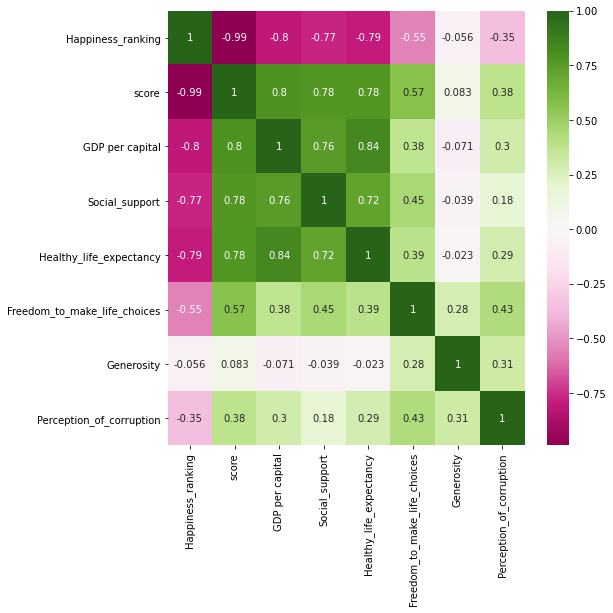

In [62]:
#Getting dataframe with only numerics for correlation matrix
correlation = Table[['Happiness_ranking', 'score', 'GDP per capital', 'Social_support', 'Healthy_life_expectancy', 'Freedom_to_make_life_choices', 'Generosity', 'Perception_of_corruption']]

#Converting the values to float
correlation['Happiness_ranking'] = correlation['Happiness_ranking'].astype(float)
correlation['GDP per capital'] = correlation['GDP per capital'].astype(float)
correlation['Social_support'] = correlation['Social_support'].astype(float)
correlation['Healthy_life_expectancy'] = correlation['Healthy_life_expectancy'].astype(float)
correlation['Freedom_to_make_life_choices'] = correlation['Freedom_to_make_life_choices'].astype(float)
correlation['Generosity'] = correlation['Generosity'].astype(float)
correlation['Perception_of_corruption'] = correlation['Perception_of_corruption'].astype(float)

#Plotting the correlation
plot.figure(figsize=(8,8))
sns.heatmap(correlation.corr(), annot=True, cmap='PiYG')